In [1]:
#DECLARAÇÃO DE BIBLIOTECAS

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone

In [2]:
#GERAÇÃO DE DADOS

np.random.seed(42) #reset do gerador randomico sempre pro mesmo ponto

M = 100 # número de exemplos
x = 6*np.random.rand(M,1) - 3 # distribuição aleatoria entre -3 e 3
n = np.random.randn(M,1) # distribuição gaussiana de media 0 e variancia 1 

y = 2 + x + 0.5*x**2 # y original
y_n = y + n # y ruidoso


In [3]:
# GERAÇÃO DOS CONJUNTOS DE TREINAMENTO E VALIDAÇÃO

x_t, x_v, y_t, y_v = train_test_split(x, y_n, test_size=0.7, random_state=42) # gera os conjuntos de treinamento e validação (random state em 42 deixa reprodutivel a divisão)

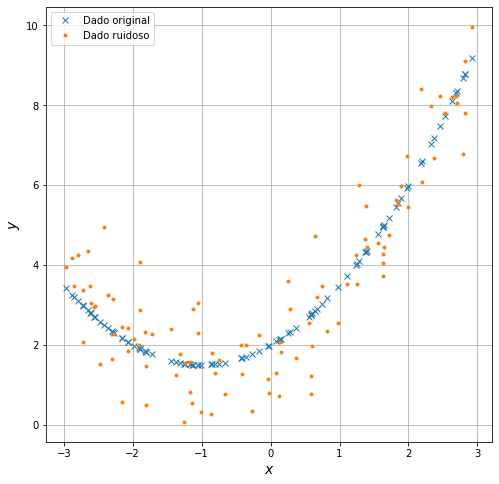

<Figure size 432x288 with 0 Axes>

In [4]:
#PLOT GRAFICO DADOS ORIGINAIS E COM RUIDO

fig = plt.figure(figsize=(8,8))
plt.plot(x, y, 'x', label='Dado original')
plt.plot(x, y_n, '.', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

plt.savefig('DADO ORIGINAL x DADO RUIDOSO EXERCICIO 2', dpi = 600)

In [5]:
#CRIANDO REGULARIZAÇÃO

reg_lambdas = np.linspace(1*10**-11, 1, 1000) # gerando lambdas

In [10]:
#REGRESSAO RIDGE

erro_t = []
erro_v = []

erro_minimo = float("inf")
melhor_iteracao = None
melhor_modelo = None
melhor_lambda = None

for i in range(0,len(reg_lambdas)):
    poly_features = PolynomialFeatures(degree=90, include_bias=True) # cria o polinomio de grau 90

    scaler = StandardScaler() # gera o escalonamento de features por padronização 

    reg = Ridge(alpha=reg_lambdas[i], tol=1) # realiza a regressão RIDGE

    model = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("reg", reg),
    ]) # cria o modelo
    
    model.fit(x_t, y_t) # treinar o modelo

    y_t_predicao = model.predict(x_t) # predição para treinamento
    y_v_predicao = model.predict(x_v) # predicao para validacao
    
    erro_t.append(mean_squared_error(y_t, y_t_predicao)) # calculo do erro de treinamento adicionando uma posicao no vetor para cada iteracao com a função append
    erro_v.append(mean_squared_error(y_v, y_v_predicao)) # calculo do erro de validacao
    
    if erro_v[i] < erro_minimo: # registro do melhor modelo
        erro_minimo = erro_v[i]
        melhor_iteracao = i
        melhor_modelo = clone(model)
        melhor_lambda = reg_lambdas[i]
        
print('MELHOR ITERACAO:',melhor_iteracao)
print('MELHOR FATOR DE REGULARIZACAO:',melhor_lambda)
print('ERRO MINIMO:',erro_minimo)


MELHOR ITERACAO: 143
MELHOR FATOR DE REGULARIZACAO: 0.1431431431517117
ERRO MINIMO: 114.442720461096


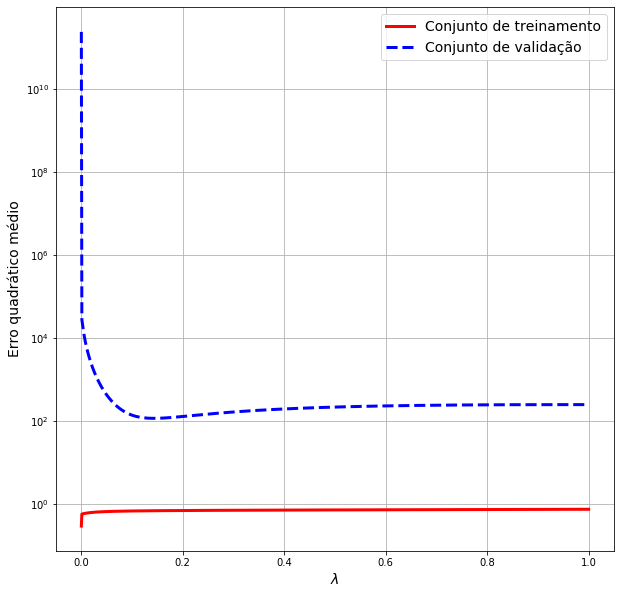

<Figure size 432x288 with 0 Axes>

In [13]:
#PLOT GRAFICOS ERRO DE TREINAMENTO E VALIDACAO x LAMBDA

fig = plt.figure(figsize=(10,10))

plt.plot(reg_lambdas, erro_t, "r-", linewidth=3, label="Conjunto de treinamento")
plt.plot(reg_lambdas, erro_v, "b--", linewidth=3, label="Conjunto de validação")
plt.legend(loc="upper right", fontsize=14)
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()

plt.savefig('ERROS TREINAMENTO E VALIDACAO x LAMBDA REG_RIDGE EXERCICIO 2', dpi = 600)

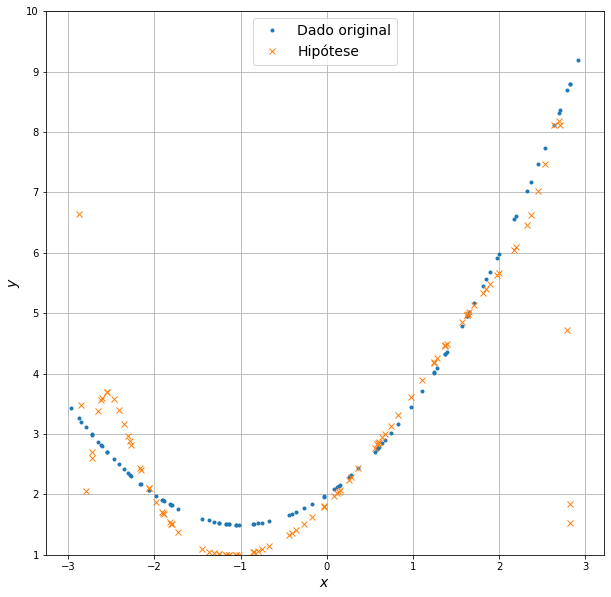

<Figure size 432x288 with 0 Axes>

In [8]:
#PLOT DA COMPARAÇÃO MELHOR MODELO COM O REAL

melhor_modelo.fit(x_t, y_t) # treinar o modelo

fig = plt.figure(figsize=(10,10))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x, melhor_modelo.predict(x), 'x', label='Hipótese')
plt.ylim([1, 10])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

plt.savefig('MELHOR MODELO x ORIGINAL REG_RIDGE EXERCICIO 2', dpi = 600)

In [9]:
#PRINT DOS 90 ATRIBUTOS DO MELHOR MODELO
print('LAMBDA: %1.4e:' % (melhor_lambda))
print('ATRIBUTOS: ', melhor_modelo.named_steps['reg'].coef_) # print dos atributos do melhor modelo

LAMBDA: 1.4314e-01:
ATRIBUTOS:  [[ 0.          2.45407197  1.29275468 -0.72289254 -0.29802956 -0.67807698
   0.07481739 -0.29131335  0.3456792  -0.02346035  0.37131758  0.13008696
   0.27335943  0.21589795  0.14239846  0.26014553  0.02218748  0.27481103
  -0.07097428  0.26663309 -0.13421845  0.2411169  -0.17065213  0.20354616
  -0.1856151   0.15887775 -0.18481339  0.11142186 -0.17342153  0.06462199
  -0.15571004  0.02099145 -0.13496279 -0.01782707 -0.11354735 -0.05093052
  -0.09305518 -0.07799673 -0.07446211 -0.09912764 -0.05828164 -0.11471086
  -0.04469754 -0.12530682 -0.03367148 -0.13156219 -0.02502593 -0.13414719
  -0.01850539 -0.13371299 -0.01381969 -0.13086475 -0.01067325 -0.12614649
  -0.00878377 -0.12003454 -0.00789313 -0.1129366  -0.00777293 -0.10519474
  -0.00822627 -0.09709049 -0.00908722 -0.08885113 -0.01021878 -0.08065643
  -0.01151013 -0.07264525 -0.01287341 -0.06492182 -0.01424064 -0.05756145
  -0.01556059 -0.05061565 -0.01679602 -0.0441166  -0.01792113 -0.03808099
  -0.0